In [2]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [4]:
# loading the data
df =pd.read_csv('https://raw.githubusercontent.com/waleolajumoke/uberdataanalysis/main/uber.csv')
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [5]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


#### observations
1.the holiday are in categorical data
2.the weather variables are numerical
3.pickup dates has both data and time 
4.the borough contains name of where the pick r0wsup is made
5.data starts from january 1st 2015
6.we have 6 months worth of data to analyze
7.29101 rows and 13 columns

In [6]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [8]:
df.shape

(29101, 13)

In [9]:
# checking data types,missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [10]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [11]:
# statistical summary
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


In [12]:
df.describe(exclude ='number')

,pickup_dt,borough,hday
count,29101,26058,29101
unique,4343,6,2
top,2015-01-01 01:00:00,Bronx,N
freq,7,4343,27980


In [13]:
# checking unique value
df["hday"].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df["borough"].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [15]:
# number of unique values for each location
df["borough"].value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64

In [16]:
# trip during holioday vs non holiday
df["hday"].value_counts()

hday
N    27980
Y     1121
Name: count, dtype: int64

In [18]:
# c0verting pickup date to datetime using pandas
df['pickup_dt']=pd.to_datetime(df['pickup_dt'])
df['pickup_dt']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [21]:
# conversion
df.pickup_dt = pd.to_datetime(df.pickup_dt)

#extracting day,time etc
df["day_name"]= df.pickup_dt.dt.day_name()
df["month_name"] = df.pickup_dt.dt.month_name()
df["start_hour"] = df.pickup_dt.dt.hour
df["day"] = df.pickup_dt.dt.day
df["year"] = df.pickup_dt.dt.year

In [22]:
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,day_name,month_name,start_hour,day,year
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015


In [25]:
# removing pickup date column
#df = df.drop("pickup_dt", axis = 1)
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,day_name,month_name,start_hour,day,year
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015


In [28]:
# handling missing data in borough
df["borough"].value_counts(normalize = True,dropna = False)

borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: proportion, dtype: float64

##### observations
1. the borough have same numbers of values
2. the missing values is close to each value under borough

In [30]:
# change missing values to unknown
df["borough"] =df["borough"].fillna("unknown")
df["borough"].value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
unknown          3043
Name: count, dtype: int64

In [31]:
# check missing value
df.isnull().sum()

borough       0
pickups       0
spd           0
vsb           0
temp          0
dewp          0
slp           0
pcp01         0
pcp06         0
pcp24         0
sd            0
hday          0
day_name      0
month_name    0
start_hour    0
day           0
year          0
dtype: int64

In [32]:
# counting total of trip on holiday vs non holiday
holiday = df["hday"].value_counts()
holiday

hday
N    27980
Y     1121
Name: count, dtype: int64

<Axes: xlabel='hday', ylabel='count'>

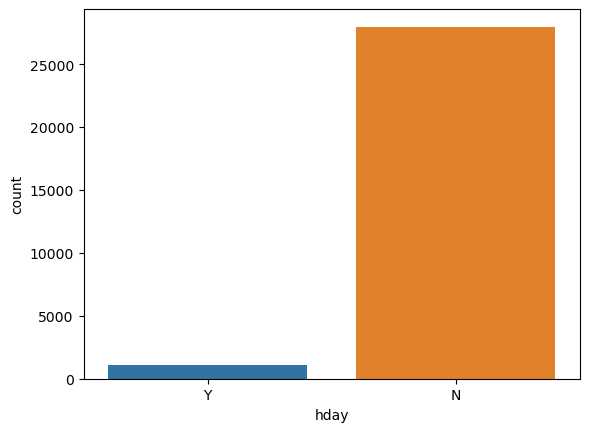

In [34]:
# plotting trip on holiday vs on holiday
# univariate aalysis
sns.countplot(df,x ="hday")

In [37]:
# multivariate analysis
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp','slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()
corr

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickups,1.000000,0.011103,-0.007484,0.054857,0.033456,-0.015011,0.004406,-0.002909,-0.020219,-0.008241
spd,0.011103,1.000000,0.089056,-0.294548,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,-0.007484,0.089056,1.000000,0.023981,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,0.054857,-0.294548,0.023981,1.000000,0.896665,-0.224439,-0.012767,-0.037722,-0.014382,-0.548750
dewp,0.033456,-0.321730,-0.232188,0.896665,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485
slp,-0.015011,-0.091698,0.165451,-0.224439,-0.310104,1.000000,-0.088466,-0.103059,-0.133964,0.123538
pcp01,0.004406,-0.000250,-0.487121,-0.012767,0.115585,-0.088466,1.000000,0.126185,0.001017,-0.000974
pcp06,-0.002909,0.016266,-0.117681,-0.037722,0.012435,-0.103059,0.126185,1.000000,0.253583,0.040092
pcp24,-0.020219,-0.010563,0.000323,-0.014382,0.001250,-0.133964,0.001017,0.253583,1.000000,0.070604
sd,-0.008241,0.097919,-0.048110,-0.548750,-0.492485,0.123538,-0.000974,0.040092,0.070604,1.000000


 observations
1.weather variables doesnt affect pickup

<Axes: >

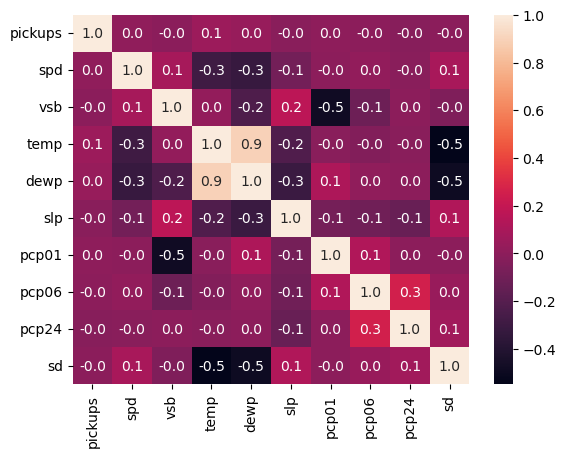

In [42]:
sns.heatmap(corr, annot = True, fmt = '.1f')

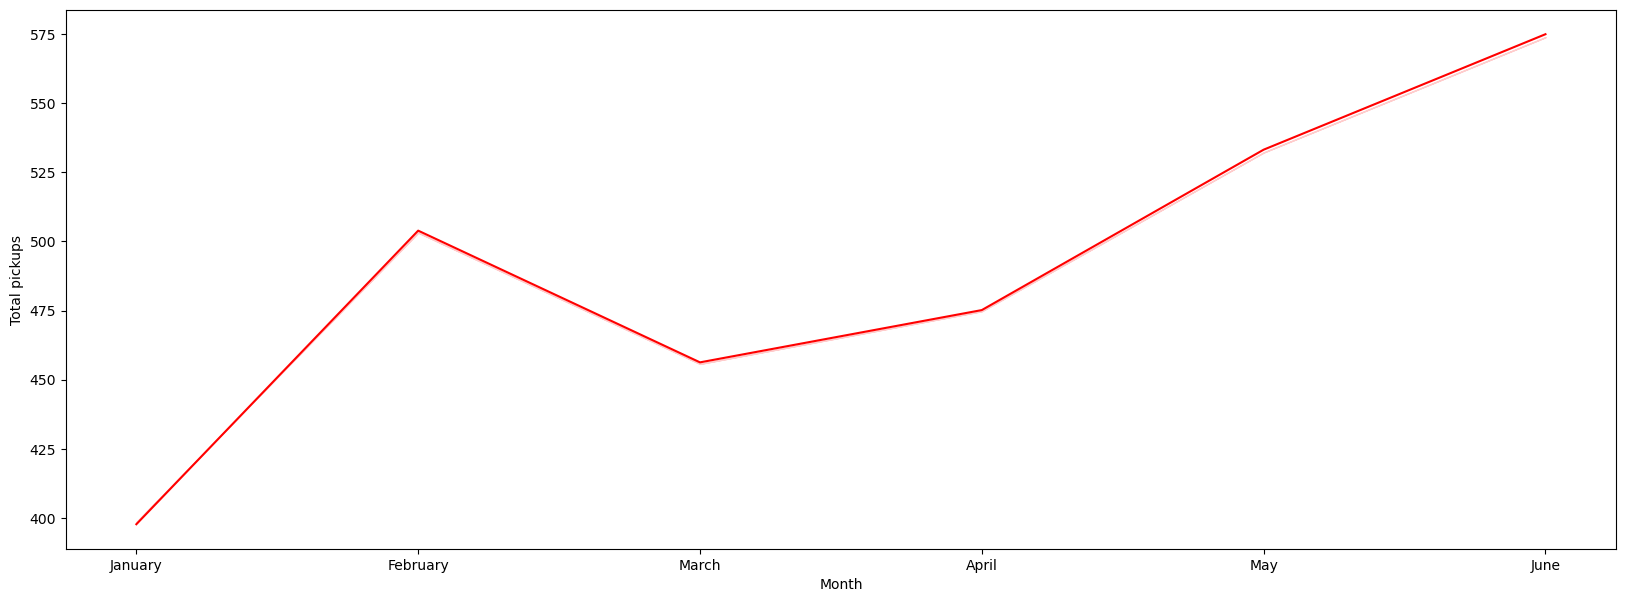

In [46]:
# pickup across the month
#months = df.month_name.unique().tolist()
#month_trend = pd.categorical(df.month_name,ordered = True, categories = months)

plt.figure(figsize=(20,7))
sns.lineplot(df,x = "month_name", y = "pickups", color = "red",ci =0)
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

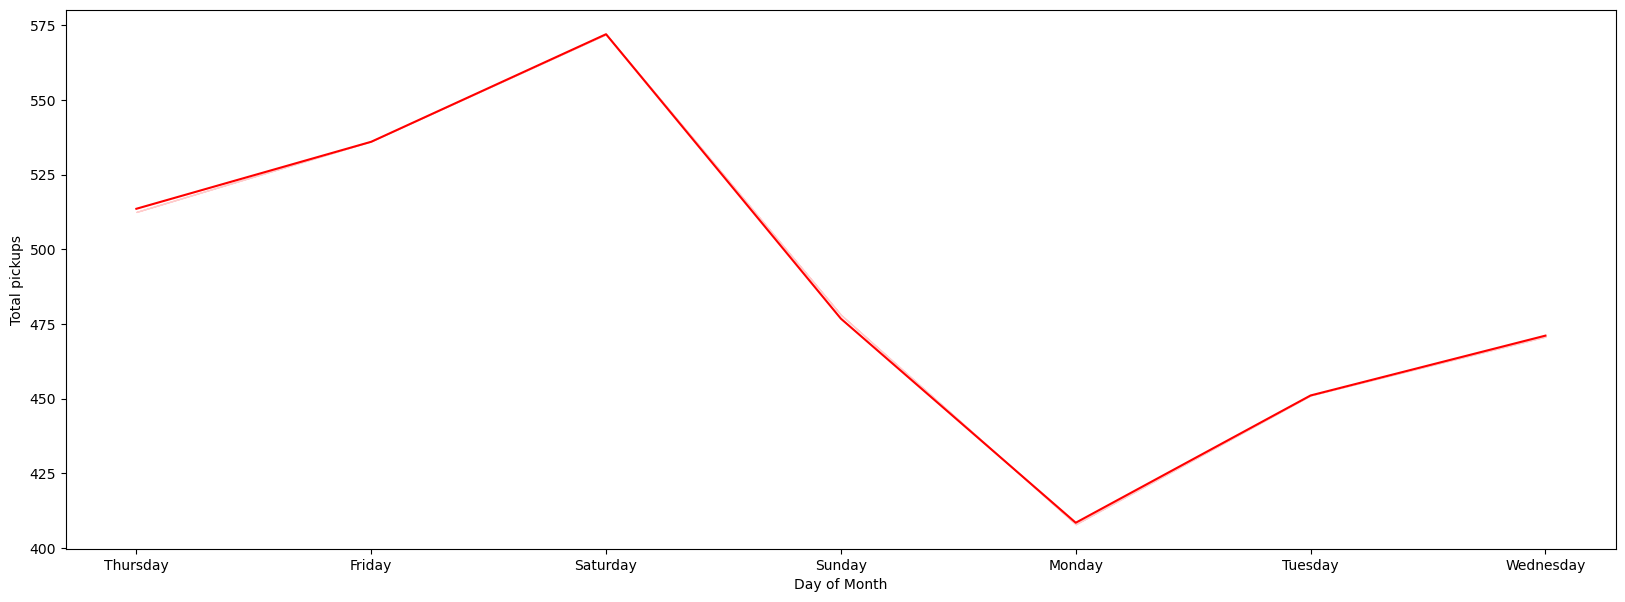

In [50]:
#pickup day of month
plt.figure(figsize=(20,7))
sns.lineplot(df,x = "day_name", y = "pickups", color = "red",ci =0)
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

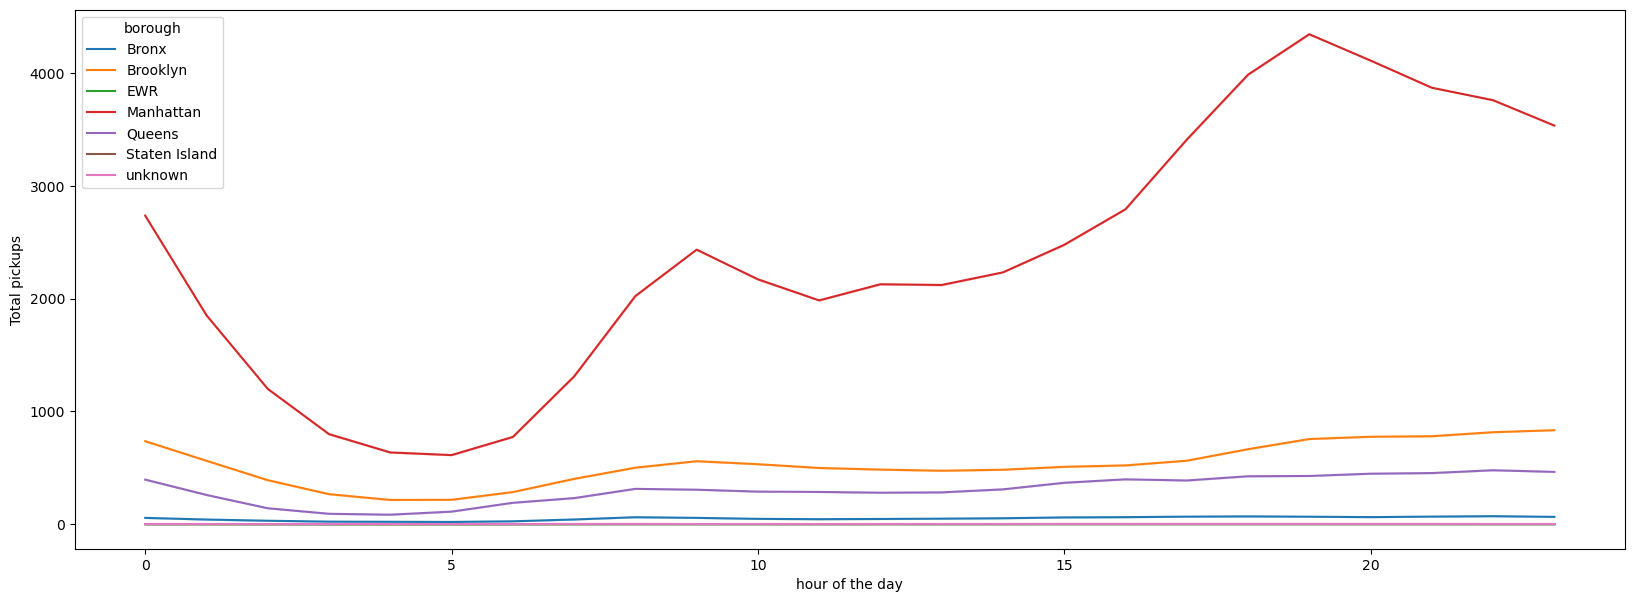

In [52]:
#pickup hour of the day i different borough
plt.figure(figsize=(20,7))
sns.lineplot(df,x = "start_hour", y = "pickups", color = "red",ci =0, hue = "borough")
plt.ylabel('Total pickups')
plt.xlabel('hour of the day')
plt.show()